</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

In [1]:
filename_version='2dot18'

In [2]:
import sys
source_directory = "/Users/pauljacob/Library/Python/3.8/lib/python/site-packages"

sys.path.append(source_directory)

In [3]:
#file structure
!pip3 install cookiecutter

#general
!pip3 install --upgrade pip
!pip3 install ipython-autotime --quiet


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
%load_ext autotime

time: 259 µs (started: 2022-12-12 04:45:20 -08:00)


## Import Libraries

In [5]:
#get libraries
import pandas as pd
import os
import numpy as np


#get visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.patches as mpatches



#ML preprocessing
from sklearn.preprocessing import StandardScaler

#get ML functions
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import __version__ as sklearn_version
import datetime


#get ML metric functions
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss, auc, brier_score_loss
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report, brier_score_loss
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import log_loss

#get icr module and associated common functions
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

#sound alert
from IPython.display import Audio

time: 1.37 s (started: 2022-12-12 04:45:20 -08:00)


In [6]:
#initialize notebook
initialize_custom_notebook_settings()

%load_ext autoreload
%autoreload 1
%aimport in_vehicle_coupon_recommendation 


time: 20.6 ms (started: 2022-12-12 04:45:21 -08:00)


## Get In-Vehicle Coupon Recommendation Dataset

In [7]:
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))
df = df.sample(frac=1, random_state=200)
#p(df)

time: 44.2 ms (started: 2022-12-12 04:45:21 -08:00)


<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [8]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})


#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)

del column_name_age_value_dict, column_name_age_value_list, column_name_age_value_list_cleaned_up


#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]

del column_name_list_not_toCoupon_GEQ5min


#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)

del column_name_Bar_value_dict, column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up, column_name_list_same_unique_values


#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]

del column_name_list_not_direction_same

#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})


#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')


#fix income values
income_list = df.loc[:, 'income'].drop_duplicates().to_list()
income_list_fixed = ['\$12500 - \$24999', '\$87500 - \$99999', '\$37500 - \$49999', '\$50000 - \$62499', '\$75000 - \$87499', '\$25000 - \$37499', '\$100000 or More', 'Less than \$12500', '\$62500 - \$74999']
income_dictionary = dict(zip(income_list, income_list_fixed))
df.loc[:, 'income'] = df.loc[:, 'income'].replace(income_dictionary)
p(df)



(12684, 24)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21-25,Single,0,Bachelors degree,Student,\$12500 - \$24999,no response,never,no response,no response,no response,never,1,0,0,1
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46-49,Married partner,1,Graduate degree (Masters or Doctorate),Management,\$87500 - \$99999,no response,never,<1,<1,never,<1,1,1,1,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Some college - no degree,Sales & Related,\$37500 - \$49999,no response,<1,no response,>8,<1,never,0,0,1,1
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,\$37500 - \$49999,no response,1-3,<1,<1,<1,never,0,0,1,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31-35,Single,1,Bachelors degree,Production Occupations,\$37500 - \$49999,no response,never,never,>8,4-8,never,1,0,1,1
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,36-40,Single,1,Bachelors degree,Food Preparation & Serving Related,\$12500 - \$24999,no response,1-3,<1,>8,never,never,0,0,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,26-30,Single,0,Some college - no degree,Student,\$12500 - \$24999,no response,<1,never,>8,never,1-3,1,1,1,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46-49,Single,0,Some college - no degree,Sales & Related,Less than \$12500,no response,<1,<1,>8,>8,>8,0,0,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21-25,Single,0,Graduate degree (Masters or Doctorate),Legal,\$25000 - \$37499,no response,<1,<1,<1,no response,<1,0,0,0,1
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36-40,Married partner,1,Bachelors degree,Retired,\$50000 - \$62499,no response,1-3,never,>8,<1,never,1,0,1,0


time: 85.9 ms (started: 2022-12-12 04:45:21 -08:00)


### Store df_pre_feature_engineering from df

In [9]:
df_pre_feature_engineering = df.copy()
p(df_pre_feature_engineering)

(12684, 24)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21-25,Single,0,Bachelors degree,Student,\$12500 - \$24999,no response,never,no response,no response,no response,never,1,0,0,1
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46-49,Married partner,1,Graduate degree (Masters or Doctorate),Management,\$87500 - \$99999,no response,never,<1,<1,never,<1,1,1,1,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Some college - no degree,Sales & Related,\$37500 - \$49999,no response,<1,no response,>8,<1,never,0,0,1,1
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,\$37500 - \$49999,no response,1-3,<1,<1,<1,never,0,0,1,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31-35,Single,1,Bachelors degree,Production Occupations,\$37500 - \$49999,no response,never,never,>8,4-8,never,1,0,1,1
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,36-40,Single,1,Bachelors degree,Food Preparation & Serving Related,\$12500 - \$24999,no response,1-3,<1,>8,never,never,0,0,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,26-30,Single,0,Some college - no degree,Student,\$12500 - \$24999,no response,<1,never,>8,never,1-3,1,1,1,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46-49,Single,0,Some college - no degree,Sales & Related,Less than \$12500,no response,<1,<1,>8,>8,>8,0,0,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21-25,Single,0,Graduate degree (Masters or Doctorate),Legal,\$25000 - \$37499,no response,<1,<1,<1,no response,<1,0,0,0,1
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36-40,Married partner,1,Bachelors degree,Retired,\$50000 - \$62499,no response,1-3,never,>8,<1,never,1,0,1,0


time: 11.7 ms (started: 2022-12-12 04:45:21 -08:00)


In [10]:
column_name_list_scenario = ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon_venue_type', 'expiration', 
                             'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same_or_opposite']
pl(column_name_list_scenario)


10


['destination',
 'passenger',
 'weather',
 'temperature',
 'time',
 'coupon_venue_type',
 'expiration',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same_or_opposite']

time: 1.65 ms (started: 2022-12-12 04:45:21 -08:00)


In [11]:
df.loc[:, column_name_list_scenario].drop_duplicates().shape

(201, 10)

time: 7.56 ms (started: 2022-12-12 04:45:21 -08:00)


In [12]:
df.loc[:, column_name_list_scenario].drop_duplicates() #there are plenty of combinations of sceanrios, what are the scenario counts??

#are some scenarios not represented and why???

,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,1,0,0
1474,Work,Alone,Sunny,55,7AM,Bar,1d,1,1,1
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,0,0,1
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,0,0,1
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,1,0,1
431,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,0,0,1
11668,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,1,0,1
473,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,0,0,1
4732,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,0,0,0
2323,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,1,0,1


time: 30.7 ms (started: 2022-12-12 04:45:21 -08:00)


In [13]:
df.loc[:, column_name_list_scenario].value_counts() #yes, the most represented scenario is heading to Work, alon, sunny weather, 55 degrees, 7am, coffee house, 
#2hours till expiration.


destination      passenger  weather  temperature  time  coupon_venue_type      expiration  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same_or_opposite
Work             Alone      Sunny    55           7AM   Bar                    1d          1                  1                  1                             194
No Urgent Place  Friend(s)  Sunny    55           2PM   Carry out & Take away  1d          1                  0                  1                             181
                                     80           2PM   Coffee House           2h          1                  0                  1                             181
Work             Alone      Sunny    80           7AM   Carry out & Take away  2h          0                  0                  0                             181
No Urgent Place  Alone      Sunny    55           2PM   Restaurant(<20)        1d          0                  0                  1                             181
                 Friend(s)  S

time: 13.7 ms (started: 2022-12-12 04:45:21 -08:00)


In [14]:
#how many permutations is there?

#expiration is 2
#temperature is 3
#time is 5

#201


time: 393 µs (started: 2022-12-12 04:45:21 -08:00)


In [15]:
df.value_counts('expiration') #imbalance in the expiration date??? why???? how does this influence our analysis????

expiration
1d    7091
2h    5593
dtype: int64

time: 2.98 ms (started: 2022-12-12 04:45:21 -08:00)


In [16]:
7091 / (7091 + 5593)

0.5590507726269316

time: 2.11 ms (started: 2022-12-12 04:45:21 -08:00)


In [17]:
df.loc[:, column_name_list_scenario].drop_duplicates().value_counts('expiration')

expiration
1d    118
2h     83
dtype: int64

time: 8.41 ms (started: 2022-12-12 04:45:21 -08:00)


In [18]:
101 / (101 + 73)

0.5804597701149425

time: 1.34 ms (started: 2022-12-12 04:45:21 -08:00)


<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

## Get Category Representative Numeric Encoding for Features: expiration, time, age, income

In [19]:
#category representative numeric encoding: expiration, time, age, income

expiration_category_representative_numeric_encoding={'expiration':{'2h':2, '1d':24}}
time_category_representative_numeric_encoding={'time':{'7AM':7,'10AM':10, '2PM':14, '6PM':18, '10PM':22}}
age_category_representative_numeric_encoding={'age':{'<21':18, '21-25':23, '26-30':28, '31-35':33, '36-40':38, '41-45':43, '46-49':48, '50+':56}}
income_category_representative_numeric_encoding={'income':{'Less than $12500':6250, '$12500 - $24999':18749.5, '$25000 - $37499':31249.5, '$37500 - $49999':43749.5, '$50000 - $62499':56249.5, '$62500 - $74999':68749.5, '$75000 - $87499':81249.5, '$87500 - $99999':93749.5,'$100000 or More':150000}}

#combine category representative numeric encoding dictionaries
category_representative_numeric_encoding_dictionary = expiration_category_representative_numeric_encoding|time_category_representative_numeric_encoding|age_category_representative_numeric_encoding|income_category_representative_numeric_encoding

del expiration_category_representative_numeric_encoding, time_category_representative_numeric_encoding, age_category_representative_numeric_encoding, income_category_representative_numeric_encoding

category_representative_numeric_encoding_key_list = list(category_representative_numeric_encoding_dictionary.keys())

df_category_representative_numeric_encoding = df.loc[:, category_representative_numeric_encoding_key_list].replace(category_representative_numeric_encoding_dictionary)

del category_representative_numeric_encoding_dictionary, 

#rename columns
category_representative_numeric_encoding_substring='_category_representative_numeric_encoding'

column_name_list_category_representative_numeric_encoding = [str(column_name) + category_representative_numeric_encoding_substring for column_name in category_representative_numeric_encoding_key_list]

column_name_dictionary_category_representative_numeric_encoding = dict(zip(category_representative_numeric_encoding_key_list, column_name_list_category_representative_numeric_encoding))

df_category_representative_numeric_encoding = df_category_representative_numeric_encoding.rename(columns=column_name_dictionary_category_representative_numeric_encoding)

del column_name_dictionary_category_representative_numeric_encoding, column_name_list_category_representative_numeric_encoding, category_representative_numeric_encoding_key_list, category_representative_numeric_encoding_substring

#p(df_category_representative_numeric_encoding)

time: 21.3 ms (started: 2022-12-12 04:45:21 -08:00)


## Get Binary Encoding for Features: gender, expiration

In [20]:
#binary encoding: gender, expiration
gender_binary_encoding={'gender':{'Female':0, 'Male':1}}
expiration_binary_encoding={'expiration':{'2h':0, '1d':1}}

binary_encoding_dictionary = gender_binary_encoding|expiration_binary_encoding

del gender_binary_encoding, expiration_binary_encoding

binary_encoding_key_list = list(binary_encoding_dictionary.keys())

df_binary_encoding = df.loc[:, binary_encoding_key_list].replace(binary_encoding_dictionary)

del binary_encoding_dictionary


#rename columns
binary_encoding_substring = '_binary_encoding'
column_name_list_binary_encoding = [str(column_name) + binary_encoding_substring for column_name in binary_encoding_key_list]
column_name_dictionary_binary_encoding = dict(zip(binary_encoding_key_list, column_name_list_binary_encoding))
df_binary_encoding = df_binary_encoding.rename(columns=column_name_dictionary_binary_encoding)

del column_name_dictionary_binary_encoding, column_name_list_binary_encoding, binary_encoding_key_list, binary_encoding_substring

#p(df_binary_encoding)

time: 11.3 ms (started: 2022-12-12 04:45:21 -08:00)


## Get Ordinal Integer Encoding for Features: coupon_venue_type, education, income, age, time, temperature

In [21]:
#ordinal integer encoding: coupon_venue_type, education, income, age, time, temperature

#category ordinal features to ordinal integer encoding
coupon_venue_type_ordinal_integer_encoding={'coupon_venue_type':{'Coffee House':1, 'Bar':2, 'Carry out & Take away':3, 'Restaurant(<20)':4, 'Restaurant(20-50)':5}}
education_ordinal_integer_encoding={'education':{'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5,'Graduate degree (Masters or Doctorate)':6}}
income_ordinal_integer_encoding={'income':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, '$87500 - $99999':8, '$100000 or More':9}}
age_ordinal_integer_encoding={'age':{'<21':1, '21-25':2, '26-30':3, '31-35':4, '36-40':5, '41-45':6, '46-49':7, '50+':8}}
time_ordinal_integer_encoding={'time':{'7AM':1, '10AM':2, '2PM':3, '6PM':4, '10PM':5}}

#numeric to ordinal integer encoding
temperature_ordinal_integer_encoding={'temperature':{30:1, 55:2, 80:3}}


ordinal_integer_encoding_dictionary = coupon_venue_type_ordinal_integer_encoding|education_ordinal_integer_encoding|income_ordinal_integer_encoding|age_ordinal_integer_encoding|time_ordinal_integer_encoding|temperature_ordinal_integer_encoding

del coupon_venue_type_ordinal_integer_encoding, education_ordinal_integer_encoding, income_ordinal_integer_encoding, age_ordinal_integer_encoding, time_ordinal_integer_encoding, temperature_ordinal_integer_encoding

ordinal_integer_encoding_key_list = list(ordinal_integer_encoding_dictionary.keys())

df_ordinal_integer_encoding = df.loc[:, ordinal_integer_encoding_key_list].replace(ordinal_integer_encoding_dictionary)

del ordinal_integer_encoding_dictionary

#rename columns
ordinal_integer_encoding_substring='_ordinal_integer_encoding'
column_name_list_ordinal_integer_encoding=[str(column_name) + ordinal_integer_encoding_substring for column_name in ordinal_integer_encoding_key_list]
column_name_dictionary_ordinal_integer_encoding=dict(zip(ordinal_integer_encoding_key_list,column_name_list_ordinal_integer_encoding))
df_ordinal_integer_encoding=df_ordinal_integer_encoding.rename(columns=column_name_dictionary_ordinal_integer_encoding)

del column_name_dictionary_ordinal_integer_encoding, column_name_list_ordinal_integer_encoding, ordinal_integer_encoding_key_list, ordinal_integer_encoding_substring

#p(df_ordinal_integer_encoding)

time: 27.3 ms (started: 2022-12-12 04:45:21 -08:00)


## Get Venue Type Visits Per Month Yes Response to Ordinal Integer Encoding for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [22]:
#venue type visits per month yes response to ordinal integer encoding: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Bar':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CoffeeHouse':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CarryAway':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding={'RestaurantLessThan20':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Restaurant20To50':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}


venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary=bar_venue_visit_frequency_yes_response_ordinal_integer_encoding|coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding|carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding
#del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list=list(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary.keys())

df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df.loc[:, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list].replace(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary)

del venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary

#rename columns
venue_visit_frequency_yes_response_ordinal_integer_encoding_substring='_venue_visit_frequency_yes_response_ordinal_integer_encoding'
column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding=[str(column_name) + venue_visit_frequency_yes_response_ordinal_integer_encoding_substring for column_name in venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list]
column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding=dict(zip(venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding))
df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df_venue_visit_frequency_yes_response_ordinal_integer_encoding.rename(columns=column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding)

del column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, venue_visit_frequency_yes_response_ordinal_integer_encoding_substring, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding

#p(df_venue_visit_frequency_yes_response_ordinal_integer_encoding)

time: 29.7 ms (started: 2022-12-12 04:45:21 -08:00)


## Get Venue Type Visits Per Month No Response to Indicator Variable for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [23]:
#venue type visits per month no response to indicator variable: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_no_response_indicator_variable={'Bar':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
coffeehouse_venue_visit_frequency_no_response_indicator_variable={'CoffeeHouse':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
carryaway_venue_visit_frequency_no_response_indicator_variable={'CarryAway':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable={'RestaurantLessThan20':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurant20to50_venue_visit_frequency_no_response_indicator_variable={'Restaurant20To50':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}

venue_visit_frequency_no_response_indicator_variable_dictionary=bar_venue_visit_frequency_no_response_indicator_variable|coffeehouse_venue_visit_frequency_no_response_indicator_variable|carryaway_venue_visit_frequency_no_response_indicator_variable|restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable|restaurant20to50_venue_visit_frequency_no_response_indicator_variable

del bar_venue_visit_frequency_no_response_indicator_variable, coffeehouse_venue_visit_frequency_no_response_indicator_variable, carryaway_venue_visit_frequency_no_response_indicator_variable, restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable, restaurant20to50_venue_visit_frequency_no_response_indicator_variable

venue_visit_frequency_no_response_indicator_variable_key_list=list(venue_visit_frequency_no_response_indicator_variable_dictionary.keys())

df_venue_visit_frequency_no_response_indicator_variable=df.loc[:, venue_visit_frequency_no_response_indicator_variable_key_list].replace(venue_visit_frequency_no_response_indicator_variable_dictionary)

del venue_visit_frequency_no_response_indicator_variable_dictionary

#rename columns
venue_visit_frequency_no_response_indicator_variable='_venue_visit_frequency_no_response_indicator'
column_name_list_venue_visit_frequency_no_response_indicator_variable=[str(column_name) + venue_visit_frequency_no_response_indicator_variable for column_name in venue_visit_frequency_no_response_indicator_variable_key_list]
column_name_dictionary_venue_visit_frequency_no_response_indicator_variable=dict(zip(venue_visit_frequency_no_response_indicator_variable_key_list, column_name_list_venue_visit_frequency_no_response_indicator_variable))
df_venue_visit_frequency_no_response_indicator_variable=df_venue_visit_frequency_no_response_indicator_variable.rename(columns=column_name_dictionary_venue_visit_frequency_no_response_indicator_variable)

del column_name_dictionary_venue_visit_frequency_no_response_indicator_variable, column_name_list_venue_visit_frequency_no_response_indicator_variable, venue_visit_frequency_no_response_indicator_variable_key_list, venue_visit_frequency_no_response_indicator_variable

#p(df_venue_visit_frequency_no_response_indicator_variable)

time: 29.1 ms (started: 2022-12-12 04:45:21 -08:00)


In [24]:
df_venue_visit_frequency_no_response_indicator_variable

,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,0,1,1,1,0
1474,0,0,0,0,0
10836,0,1,0,0,0
4567,0,0,0,0,0
5658,0,0,0,0,0
...,...,...,...,...,...
11343,0,0,0,0,0
9036,0,0,0,0,0
11050,0,0,0,0,0
784,0,0,0,1,0


time: 4.62 ms (started: 2022-12-12 04:45:22 -08:00)


## Concatenate the Data Frames

In [25]:
#concatenate the data frames

#get data frame list
data_frame_list=[df, df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable]
del df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable

#concat data frames
df = pd.concat(data_frame_list, axis=1)
del data_frame_list

p(df)


(12684, 46)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21-25,Single,0,Bachelors degree,Student,\$12500 - \$24999,no response,never,no response,no response,no response,never,1,0,0,1,2,18,23,\$12500 - \$24999,1,0,3,5,\$12500 - \$24999,2,4,3,1,0,0,0,1,0,1,1,1,0
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46-49,Married partner,1,Graduate degree (Masters or Doctorate),Management,\$87500 - \$99999,no response,never,<1,<1,never,<1,1,1,1,0,24,7,48,\$87500 - \$99999,1,1,2,6,\$87500 - \$99999,7,1,2,1,2,2,1,2,0,0,0,0,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Some college - no degree,Sales & Related,\$37500 - \$49999,no response,<1,no response,>8,<1,never,0,0,1,1,24,18,28,\$37500 - \$49999,1,1,3,3,\$37500 - \$49999,3,4,1,2,0,5,2,1,0,1,0,0,0
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,\$37500 - \$49999,no response,1-3,<1,<1,<1,never,0,0,1,0,24,10,23,\$37500 - \$49999,0,1,2,6,\$37500 - \$49999,2,2,3,3,2,2,2,1,0,0,0,0,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31-35,Single,1,Bachelors degree,Production Occupations,\$37500 - \$49999,no response,never,never,>8,4-8,never,1,0,1,1,2,14,33,\$37500 - \$49999,0,0,4,5,\$37500 - \$49999,4,3,3,1,1,5,4,1,0,0,0,0,0
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,36-40,Single,1,Bachelors degree,Food Preparation & Serving Related,\$12500 - \$24999,no response,1-3,<1,>8,never,never,0,0,0,0,2,7,38,\$12500 - \$24999,0,0,5,5,\$12500 - \$24999,5,1,3,3,2,5,1,1,0,0,0,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,26-30,Single,0,Some college - no degree,Student,\$12500 - \$24999,no response,<1,never,>8,never,1-3,1,1,1,0,2,22,28,\$12500 - \$24999,1,0,4,3,\$12500 - \$24999,3,5,1,2,1,5,1,3,0,0,0,0,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46-49,Single,0,Some college - no degree,Sales & Related,Less than \$12500,no response,<1,<1,>8,>8,>8,0,0,0,0,24,18,48,Less than \$12500,1,1,5,3,Less than \$12500,7,4,3,2,2,5,5,5,0,0,0,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21-25,Single,0,Graduate degree (Masters or Doctorate),Legal,\$25000 - \$37499,no response,<1,<1,<1,no response,<1,0,0,0,1,2,7,23,\$25000 - \$37499,0,0,3,6,\$25000 - \$37499,2,1,3,2,2,2,0,2,0,0,0,1,0
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36-40,Married partner,1,Bachelors degree,Retired,\$50000 - \$62499,no response,1-3,never,>8,<1,never,1,0,1,0,24,10,38,\$50000 - \$62499,0,1,2,5,\$50000 - \$62499,5,2,3,3,1,5,2,1,0,0,0,0,0


time: 18.1 ms (started: 2022-12-12 04:45:22 -08:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [26]:
#Every feature is investigated using either histograms, bi-plots, or other visual and numeric means.

#Pearson correlation coefficients and other statistical methods were used to identify statistical relationship strengths.



time: 576 µs (started: 2022-12-12 04:45:22 -08:00)


### Initialize Variables

In [27]:
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']


time: 554 µs (started: 2022-12-12 04:45:22 -08:00)


### Income Frequency Distribution (Vertical Bar Plot)

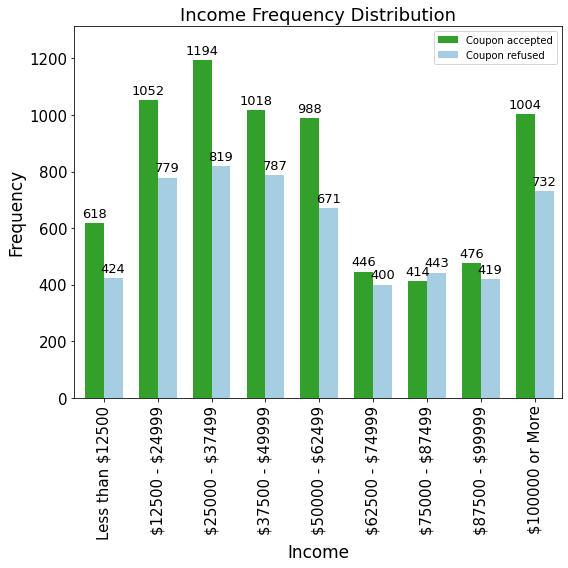

time: 331 ms (started: 2022-12-12 04:45:22 -08:00)


In [28]:
column_name = 'income'
column_name_label='Income'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]

title= str(column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name=column_name)

    #sort by value order list
    df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=True).drop(columns=[str(column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name=column_name)

    #sort by value order list
    df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=False).drop(columns=[str(column_name)+'_rank'])


    icr.plot_horizontal_bar_graph(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi)



### Income Frequency Distribution (Horizontal Bar Plot)

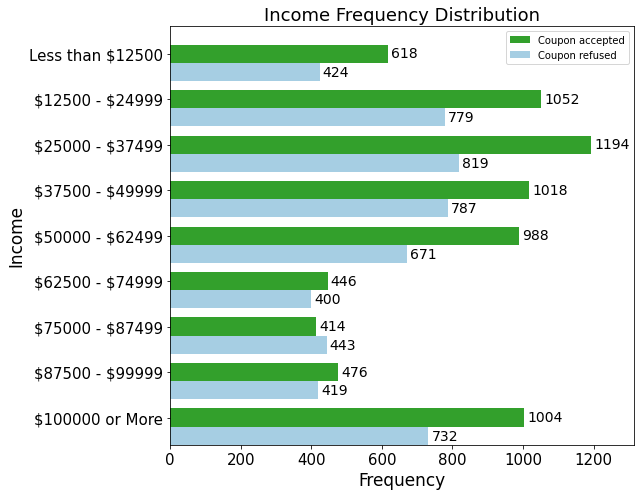

time: 296 ms (started: 2022-12-12 04:45:22 -08:00)


In [29]:
column_name = 'income'
column_name_label='Income'
bar_orientation = 'horizontal'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]

title= str(column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name=column_name)

    #sort by value order list
    df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=True).drop(columns=[str(column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi)

elif bar_orientation == 'horizontal':
    figsize=(9,7)
    ylabel=column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name=column_name)

    #sort by value order list
    df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=False).drop(columns=[str(column_name)+'_rank'])


    icr.plot_horizontal_bar_graph(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi)



In [67]:
column_name = 'income'
column_name_label='Income'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]

title= str(column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]

figsize=(8,8)
xlabel=column_name_label

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name=column_name)

#sort by value order list
df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=True).drop(columns=[str(column_name)+'_rank'])

df_index_income_coupon_refused_coupon_accepted = df_income_coupon_refused_coupon_accepted.set_index('income')
df_index_income_coupon_refused_coupon_accepted


Y,coupon refused,coupon accepted
income,,
Less than \$12500,424,618
\$12500 - \$24999,779,1052
\$25000 - \$37499,819,1194
\$37500 - \$49999,787,1018
\$50000 - \$62499,671,988
\$62500 - \$74999,400,446
\$75000 - \$87499,443,414
\$87500 - \$99999,419,476
\$100000 or More,732,1004


time: 21.6 ms (started: 2022-12-12 05:20:47 -08:00)


Index(['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499',
       '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',
       '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More'],
      dtype='object', name='income')
hey
coupon refused
income
Less than \$12500    424
\$12500 - \$24999    779
\$25000 - \$37499    819
\$37500 - \$49999    787
\$50000 - \$62499    671
\$62500 - \$74999    400
\$75000 - \$87499    443
\$87500 - \$99999    419
\$100000 or More     732
Name: coupon refused, dtype: int64
[424. 779. 819. 787. 671. 400. 443. 419. 732.]
Index(['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499',
       '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',
       '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More'],
      dtype='object', name='income')
hey
coupon accepted
income
Less than \$12500     618
\$12500 - \$24999    1052
\$25000 - \$37499    1194
\$37500 - \$49999    1018
\$50000 - \$62499     988
\$62500 - \$7499

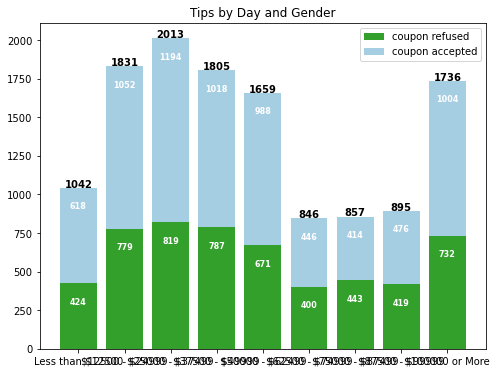

time: 156 ms (started: 2022-12-12 05:22:26 -08:00)


In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

colors = [color_list[3], color_list[0]]
bottom = np.zeros(df_index_income_coupon_refused_coupon_accepted.shape[0])



for i, col in enumerate(df_index_income_coupon_refused_coupon_accepted.columns):
    ax.bar(df_index_income_coupon_refused_coupon_accepted.index, df_index_income_coupon_refused_coupon_accepted.loc[:, col], bottom=bottom, label=col, color=colors[i])
    print(df_index_income_coupon_refused_coupon_accepted.index)
    
    print('hey')
    print(col)
    print(df_index_income_coupon_refused_coupon_accepted.loc[:, col])
    
    bottom += np.array(df_index_income_coupon_refused_coupon_accepted.loc[:, col])
    print(bottom)


totals = df_index_income_coupon_refused_coupon_accepted.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center', weight='bold')

y_offset = -135

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + bar.get_y() + y_offset, 
            round(bar.get_height()),
            ha='center',
            color='w',
            weight='bold',
            size=8)

ax.set_title('Tips by Day and Gender')
ax.legend()

In [58]:
totals

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
dtype: float64

time: 8.62 ms (started: 2022-12-12 05:13:45 -08:00)


In [39]:
agg_tips.reset_index()

sex,day,Male,Female
0,Thur,89.41,82.42
1,Fri,26.93,25.03
2,Sat,181.95,78.45
3,Sun,186.78,60.61


time: 13.7 ms (started: 2022-12-12 04:49:13 -08:00)


In [40]:
agg_tips

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


time: 11.4 ms (started: 2022-12-12 04:49:21 -08:00)


In [43]:
agg_tips.columns

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

time: 5.6 ms (started: 2022-12-12 04:50:15 -08:00)


[0. 0. 0. 0.]
hey
[ 89.41  26.93 181.95 186.78]
[171.83  51.96 260.4  247.39]


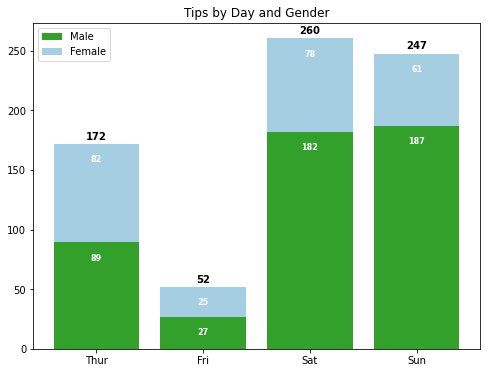

time: 109 ms (started: 2022-12-12 04:55:12 -08:00)


In [49]:

tips = sns.load_dataset('tips')
agg_tips = tips.groupby(['day', 'sex'])['tip'].sum().unstack().fillna(0)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

colors = [color_list[3], color_list[0]]
bottom = np.zeros(agg_tips.shape[0])

print(bottom)
print('hey')

for i, column_name in enumerate(agg_tips.columns):
    ax.bar(agg_tips.index, agg_tips.loc[:, column_name], bottom=bottom, label=column_name, color=colors[i])
    bottom += np.array(agg_tips.loc[:, column_name])
    print(bottom)

totals = agg_tips.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center', weight='bold')

y_offset = -15

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + bar.get_y() + y_offset, 
            round(bar.get_height()),
            ha='center',
            color='w',
            weight='bold',
            size=8)

ax.set_title('Tips by Day and Gender')
ax.legend()

In [ ]:
from numpy import random
#create a random df
data = []
for i in range(500):
    sample = {"age" : random.randint(0,5), "income" : random.randint(1,5), "satisfaction" : random.randint(1,5)}
data.append(sample)
df = pd.DataFrame(data)
#group by age
counter = df.groupby('age')['satisfaction'].value_counts().unstack()
#calculate the % for each age group 
percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
percentage_dist.plot.bar(stacked=True)

#stacked bar chart with percentage annotations
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

In [ ]:
#Every feature is investigated using either histograms, bi-plots, or other visual and numeric means.


n= 6

m1 = (0.10,0.12,0.10,0.11,0.14,0.10)
m2=(0.21,0.21,0.20,0.22,0.20,0.21)
m3=(0.29,0.27,0.28,0.24,0.23,0.23)
m4=(0.41,0.39,0.35,0.37,0.41,0.40)
x=[1,2,3,4,5,6]

fig, ax = plt.subplots()

index = np.arange(n)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, m1, bar_width, alpha=opacity, color='b', error_kw=error_config)

r2 = ax.bar(index + bar_width, m2, bar_width, alpha=opacity, color='r', error_kw=error_config)

r3 = ax.bar(index + bar_width + bar_width, m3, bar_width, alpha=opacity, color='y', error_kw=error_config)
r4 = ax.bar(index + bar_width + bar_width + bar_width, m4, bar_width, alpha=opacity, color='c', error_kw=error_config)                 

plt.xlabel('D')
plt.ylabel('Anz')
plt.title('Th')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.bar(x,m1, 0.2)# % thickness=0.2
ax2.bar(x,m2, 0.2)
ax3.plot(x,m3)
ax4.plot(x,m4)

plt.tight_layout()
plt.show()


In [ ]:
#what are we predicting and what are the most important ways for segmenting what we are predicting?? 
#for example, we are predicting "coupon acceptance" and want to segment by coupon type. do we know acceptance type, i.e. use it immediately or use it later??? (no).

#what are the most important features for segmenting our predictions as categories???

#in the results we could segment predictions by 

In [ ]:
#get plots for all the features


In [ ]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_v3_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'No', 1:'Yes'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('Coupon Acceptance Distribution', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

In [ ]:
#take top features and check for statistical significant between them by response, i.e. did accept or did not accept coupon.

top_feature = 'expiration_category_representative_numeric_encoding'

df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted = df.loc[df.loc[:, 'Y'] == 0, [top_feature] + ['Y']]
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted = df.loc[df.loc[:, 'Y'] == 1, [top_feature] + ['Y']]

In [ ]:
#Proportion Hypothesis Tests for Binary Data

#https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/

#2 Proportions test to compare two samples

#1 Proportion test example: comparison to a target

In [ ]:
df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted.value_counts()

In [ ]:
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted.value_counts()

In [ ]:
4436 / (4436 + 2774)

In [ ]:
#of scenarios where the the coupon is accepted, 61.5% of the time, it's a 24hours til expiration 

In [ ]:
df_coupon_venue_type_count = df.loc[:, 'coupon_venue_type'].value_counts(ascending=True)

plt.barh(y=df_coupon_venue_type_count.index, width=df_coupon_venue_type_count.values)


In [ ]:
df_Y_coupon_venue_type_count = df.groupby(['Y', 'coupon_venue_type']).count().iloc[:, 0].reset_index().rename(columns={'destination':'coupon_venue_type_count'})
df_Y_coupon_venue_type_count


In [ ]:
df_coupon_venue_type_refused_accepted_coupon_count = \
df_Y_coupon_venue_type_count.pivot(index='coupon_venue_type', columns='Y', values='coupon_venue_type_count').rename(columns={0:'Refused Coupon', 1:'Accepted Coupon'}).reset_index()

df_coupon_venue_type_refused_accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, ['coupon_venue_type', 'Accepted Coupon', 'Refused Coupon']]

df_coupon_venue_type_refused_accepted_coupon_count

In [ ]:
# #order the coupon venue type by accepted coupon percentage
# coupon_venue_type_list = ['Carry out & Take away', 'Restaurant(<20)', 'Coffee House', 'Restaurant(20-50)', 'Bar']
# coupon_venue_type_index_dictionary = dict(zip(coupon_venue_type_list, range(len(coupon_venue_type_list))))
# df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type_rank'] = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type'].map(coupon_venue_type_index_dictionary)
# df_coupon_venue_type_refused_accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count.sort_values(['coupon_venue_type_rank', ], ascending=[True]).drop(columns='coupon_venue_type_rank')



# #get stacked bar plot of coupon venue type acceptance and refusal
# figure_filename = '../reports/figures/figure_bar_count_percentage_stacked_coupon_venue_accepted_refused_ordered_by_accepted_percentage_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'
# dpi=100

# icr.plot_bar_graph(df=df_coupon_venue_type_refused_accepted_coupon_count, 
#                x='coupon_venue_type', 
#                bar_category_list=['Refused Coupon', 'Accepted Coupon'], 
#                title='Coupon Venue Count and Percentage per Acceptance or Refusal', 
#                color=['#8c6bb1', '#41ab5d'], 
#                figsize=(12, 10),
#                figure_filename=figure_filename,
#                dpi=dpi)


In [ ]:
#order the coupon venue type by total count
coupon_venue_type_list = ['Coffee House', 'Restaurant(<20)','Carry out & Take away', 'Bar', 'Restaurant(20-50)', ]
coupon_venue_type_index_dictionary = dict(zip(coupon_venue_type_list, range(len(coupon_venue_type_list))))
df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type_rank'] = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type'].map(coupon_venue_type_index_dictionary)
df_coupon_venue_type_refused_accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count.sort_values(['coupon_venue_type_rank', ], ascending=[True]).drop(columns='coupon_venue_type_rank')




#get stacked bar plot of coupon venue type acceptance and refusal
dpi=100
figure_filename = '../reports/figures/figure_bar_count_percentage_stacked_coupon_venue_accepted_refused_ordered_by_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

color_list=['lightblue', 'lightgreen']
#color_list=['#8c6bb1', '#41ab5d']

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(15, 12))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    icr.plot_bar_graph(df=df_coupon_venue_type_refused_accepted_coupon_count, 
                   x='coupon_venue_type', 
                   bar_category_list=['Refused Coupon', 'Accepted Coupon'], 
                   title='Coupon Venue Count and Percentage per Acceptance or Refusal', 
                   color=color_list, 
                   figsize=(12, 10),
                   figure_filename=figure_filename,
                   dpi=dpi)

plt.show()

In [ ]:
#get accepted coupon rate
df_coupon_venue_type_accepted_coupon_rate = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'Accepted Coupon'] / (df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'Accepted Coupon'] + df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'Refused Coupon']) * 100
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate = pd.concat([df_coupon_venue_type_refused_accepted_coupon_count, df_coupon_venue_type_accepted_coupon_rate.to_frame().rename(columns={0:'Accepted Coupon Rate'})], axis=1)
del df_coupon_venue_type_accepted_coupon_rate

df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate

In [ ]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])


for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500])

ax2 = bar2.twinx()
color = 'green'

ax2.set_ylabel('Accepted Coupon Rate', fontsize=16)
#ax2 = sns.lineplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

In [ ]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])

for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500]) 

ax2 = bar2.twinx()
color = 'green'

ax2.set_ylabel('Accepted Coupon Rate', fontsize=16)
ax2 = sns.lineplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

In [ ]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon Count'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
line_bar = mpatches.Patch(color='green', label='Accepted Coupon Rate')
plt.legend(handles=[bottom_bar, line_bar])

for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500]) 

ax2 = bar2.twinx()
color = 'green'

ax2.set_ylabel('Accepted Coupon Rate', fontsize=16)
ax2 = sns.lineplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, sort=False, color=color, legend='full')
ax2.tick_params(axis='y', color=color)
ax2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

In [ ]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon'].to_list()
refused_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Refused Coupon'].to_list()

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])

for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500]) 


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

In [ ]:
number_of_indexes = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.shape[0]

index = np.arange(number_of_indexes)
width = 0.35

accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon'].to_list()
refused_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Refused Coupon'].to_list()
x_tick_labels = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'coupon_venue_type'].to_list()

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(index, accepted_coupon_count, width, color='royalblue')
rects2 = ax.bar(index+width, refused_coupon_count, width, color='seagreen')


ax.set_ylabel('Count')
ax.set_title('Accepted and Refused Coupon Count')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(x_tick_labels)

ax.legend((rects1[0], rects2[0]), ('Accepted Coupon', 'Refused Coupon'))


plt.show()

In [ ]:
#^---side by side accepted count refusal count bar graph???


#why is the a large count for some coup venue types and not others?

#if we do not know why, then what can we conclude??

#what do we know about the existing coupon market????



### Bar Plot Coupon Accepted Rate

### Initialize Variables

In [ ]:
index_name_list = [1, 4, 2, 3, 0]
index_name_list.reverse()
index_name_list_reversed = index_name_list.copy()
index_name_list.reverse()

index_name_list_reversed

In [ ]:
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[index_name_list,:]
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered


In [ ]:
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_reverse_ordered = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[index_name_list_reversed,:]
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_reverse_ordered


### Coupon Acceptance Rate Per Coupon Venue

In [ ]:
#law of large numbers for converting on true percentage???

plt.barh(y=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[:, 'coupon_venue_type'], width=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[:, 'Accepted Coupon Rate'])
plt.title('Accepted Coupon Rate Per Coupon Venue', fontsize=16)
plt.xlabel('Accepted Coupon Rate (%)', fontsize=14)
plt.ylabel('Coupon Venue Type', fontsize=14)


In [ ]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Accepted Coupon Rate'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon Rate'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])


for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 6.9), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

In [ ]:
#bar visit frequency



In [ ]:
#education


In [ ]:
#%autoreload 1
%aimport in_vehicle_coupon_recommendation 

#%pdb
1
#%pdb 0

#%debug

In [ ]:
#https://www.python-graph-gallery.com/donut-plot/

#donut plots

In [ ]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')

rgba = cmap(0.5)
print(rgba)

### Initialize Plot Variables

In [ ]:
title_fontsize=16
dpi=100
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
#color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']
#color_list =  ['red', 'green', 'blue', 'skyblue', 'yellow', 'purple', 'orange', 'pink', 'yellowgreen']
circle_color='white'


### Income Donut Plot

In [ ]:
column_name='income'
title = 'Income Donut Plot'
figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['\$25000 - \$37499', '\$12500 - \$24999', '\$37500 - \$49999', '\$100000 or More', '\$50000 - \$62499', 'Less than \$12500', '\$87500 - \$99999', '\$75000 - \$87499', '\$62500 - \$74999']
size_list = [2013, 1831, 1805, 1736, 1659, 1042,  895,  857,  846]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



### Age Donut Plot

In [ ]:
column_name = 'age'
title = 'Age Donut Plot'

figure_filename = '../reports/figures/figure_' + column_name +'_plot_income_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['26-30', '21-25', '31-35', '36-40', '<21', '41-45', '46-49', '50+']
size_list = [2653, 2559, 2039, 1788, 1319, 1093,  686,  547]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



### Monthly Coffee House Visit Frequency

In [ ]:
df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].value_counts().values

In [ ]:
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_dencoding = {value : key for key, value in coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding['CoffeeHouse'].items()}
pdc(coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_dencoding)

In [ ]:
column_name='monthly_coffee_house_visit_frequency'
title = 'Monthly Coffee House Visit Frequency Donut Plot'
#title = 'Yes Response: Monthly Coffee House Visit Frequency Donut Plot'

figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['never', '<1', '1-3', '>8', 'no response', '4-8']
size_list = [3385, 3225, 2962, 1784, 1111,  217]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



In [ ]:
column_name='monthly_coffee_house_visit_frequency_encoding'
title = 'Monthly Coffee House Visit Frequency Donut Plot'
#title = 'Yes Response: Monthly Coffee House Visit Frequency Donut Plot'

figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['1 : never', '2 : <1', '3 : 1-3', '5 : >8', '0 : no response', '4 : 4-8']
size_list = [3385, 3225, 2962, 1784, 1111,  217]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



In [ ]:
df_Y_coupon_venue_type_proportion = df.groupby(['Y', 'coupon_venue_type']).agg({'coupon_venue_type': 'count'}).groupby(level=1).apply(lambda x: x / float(x.sum()))
df_Y_coupon_venue_type_proportion = df_Y_coupon_venue_type_proportion.rename(columns={'coupon_venue_type':'coupon_venue_type_proportion'}).reset_index()
df_Y_coupon_venue_type_proportion.sort_values(['Y', 'coupon_venue_type_proportion', 'coupon_venue_type'], ascending=False)


In [ ]:
for thing in df_Y_coupon_venue_type_proportion.columns:
    print(thing)

In [ ]:
for thing in df_Y_coupon_venue_type_proportion:
    print(thing)

In [ ]:
df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y'] == 0, :]

In [ ]:
#stacked bar with coupon acceptance rate
import matplotlib.pyplot as plt


labels = df_coupon_venue_type_count.index.to_list()
refuse_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==0, 'coupon_venue_type_proportion'].to_list()
accept_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==1, 'coupon_venue_type_proportion'].to_list()
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, refuse_coupon, width, label='Refuse Coupon')
ax.bar(labels, accept_coupon, width, bottom=refuse_coupon, label='Accept Coupon')

ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_xlabel(xlabel='Coupon Venue Type', fontsize=14)
ax.set_title('Coupon Venue Type Count By Coupon Acceptance', fontsize=18)
ax.legend()

plt.show()

In [ ]:
df_Y_coupon_venue_type_proportion

In [ ]:
df_Y_coupon_venue_type_proportion

In [ ]:
# Define the sorter
sorter = ['Carry out & Take away',
          'Restaurant(<20)',
          'Coffee House',
          'Restaurant(20-50)',
          'Bar']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))


df_Y_coupon_venue_type_proportion.loc[:, 'coupon_venue_type_rank'] = \
df_Y_coupon_venue_type_proportion.loc[:, 'coupon_venue_type'].map(sorterIndex)


df_Y_coupon_venue_type_proportion = df_Y_coupon_venue_type_proportion.sort_values(['Y', 'coupon_venue_type_rank', ], ascending=[True , True])

#df_Y_coupon_venue_type_proportion = df_Y_coupon_venue_type_proportion.drop('coupon_venue_type_rank', 1)

df_Y_coupon_venue_type_proportion

In [ ]:
#stacked bar with coupon acceptance rate

labels = df_coupon_venue_type_count.index.to_list()
refuse_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==0, 'coupon_venue_type_proportion'].to_list()
accept_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==1, 'coupon_venue_type_proportion'].to_list()
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, accept_coupon, width, label='Accept Coupon', color='green')
ax.bar(labels, refuse_coupon, width, bottom=accept_coupon, label='Refuse Coupon', color='lightblue')

ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1,])
ax.set_xlabel(xlabel='Coupon Venue Type', fontsize=14)
ax.set_title('Coupon Venue Type Count By Coupon Acceptance', fontsize=18)
ax.legend()

plt.show()

In [ ]:
#^--- add percentages

In [ ]:
#analytics shows proportion of scenarios when a survey participant accepts vs denies a coupon


In [ ]:
df_Y_coupon_accepted_coupon_venue_type = df.loc[df.loc[:, 'Y'] == 1, ['Y', 'coupon_venue_type']]
#p(df_Y_coupon_accepted_coupon_venue_type)

df_Y_coupon_denied_coupon_venue_type = df.loc[df.loc[:, 'Y'] == 0, ['Y', 'coupon_venue_type']]
p(df_Y_coupon_denied_coupon_venue_type)


In [ ]:
df.groupby(['Y', 'coupon_venue_type']).count().iloc[:, 0].reset_index().rename(columns={'destination':'count'})


In [ ]:
#stacked bar with coupon acceptance rate
import matplotlib.pyplot as plt


labels = df_coupon_venue_type_count.index.to_list()
refuse_coupon = [20, 35, 30, 35, 27]
accept_coupon = [25, 32, 34, 20, 25]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, refuse_coupon, width, label='Refuse Coupon')
ax.bar(labels, accept_coupon, width, bottom=refuse_coupon, label='Accept Coupon')

ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_xlabel(xlabel='Coupon Venue Type', fontsize=14)
ax.set_title('Coupon Venue Type Count By Coupon Acceptance', fontsize=18)
ax.legend()

plt.show()

In [ ]:
#five types of coupons:
#bars
#takeaway food restaurants
#coffee houses
#cheap restaurants (average expense below $20 per person)
#expensive restaurants (average expense between $20 to $50 per person)

df.loc[:, 'coupon_venue_type'].value_counts()


In [ ]:
#correlation heatmap
dpi=100
figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)

if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(30, 24))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    plt.figure(figsize=(30, 24))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [ ]:
#^-----fix runtime here.

In [ ]:
#.11 correlation between coupon acceptance and reported CoffeeHouse venue visit frequency

#.099 correlation between venue coupon type and coupon accpetance

#.13 correlation between coupon expiraton and coupon acceptance

#.07 correaltio between reported expensive restaurant visit frequency and coupon acceptance

#.07 correlation between coupon acceptance and reported bar visit frequency 

#.061 correlation between temperature and coupon acceptance

#-.1 correlation between coupon acceptance and driver travel time to venue is greater than 25 minute

#-.082 correlation between coupon acceptance and driver travel time to venue is greater than 15 minute

#-.046 correlation between having children and accpeting coupon

In [ ]:
dir()

In [ ]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

In [ ]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

In [ ]:
#save preprocessed data frame
data_frame_version=filename_version
df_collection_filename='df_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=df_collection_filename)
if df_readback != None:
    df_collection = df_readback
else:
    df_collection = {}
    
    #split the data into train and test
    df_collection['X_train'], df_collection['X_test'], df_collection['Y_train'], df_collection['Y_test'] = \
    train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    df_collection = icr.save_and_return_collection(data_frame_collection=df_collection, filename=df_collection_filename)

p(df_collection['X_train'])

## Get Stratified Train Data Frame Collection Before Data Preprocesssing

In [ ]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(X=df_collection['X_train'], y=df_collection['Y_train'].to_frame())):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold ' + str(index)] = \
    {'X_train' : df_collection['X_train'].iloc[train_index, :], \
     'X_test' : df_collection['X_train'].iloc[test_index, :], \
     'Y_train' : df_collection['Y_train'].iloc[train_index], \
     'Y_test' : df_collection['Y_train'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold 0']['X_test'])



In [ ]:
data_frame_list = [stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold ' + str(index)]['X_test'] for index in range(5)]

df_stratified_fold_number_X_test = pd.concat(data_frame_list)

p(df_stratified_fold_number_X_test)

<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

## Convert Indicator Variables from Categorical Variables And Add Back to Numeric Variables

In [ ]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

del df_categorical_features

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)

del df_numeric_features, 

p(df_indicator_numeric_features)


## Standardize And Scale Variables

In [ ]:
#standardize and scale feature data frame
standard_scaler = StandardScaler()
standardized_scaled_df_indicator_numeric_features_ndarray = standard_scaler.fit_transform(df_indicator_numeric_features)
df_indicator_numeric_features_standardized_scaled = pd.DataFrame(standardized_scaled_df_indicator_numeric_features_ndarray, columns=df_indicator_numeric_features.columns, index=df_indicator_numeric_features.index)

del df_indicator_numeric_features, standardized_scaled_df_indicator_numeric_features_ndarray, StandardScaler

p(df_indicator_numeric_features_standardized_scaled)

In [ ]:
p(df_target)

## Convert To Data Frame Collection With Train and Test Features and Train and Test Target From Standardized and Scaled Features Data Frame

In [ ]:
#save preprocessed data frame
data_frame_version=filename_version
data_frame_collection_filename='data_frame_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    data_frame_collection = {}
    
    #split the data into train and test
    data_frame_collection['X_train'], data_frame_collection['X_test'], data_frame_collection['Y_train'], data_frame_collection['Y_test'] = \
    train_test_split(df_indicator_numeric_features_standardized_scaled, df_target, test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename)

del df_indicator_numeric_features_standardized_scaled

p(data_frame_collection['X_train'])

In [ ]:
p(data_frame_collection['Y_train'])

In [ ]:
print(data_frame_collection['X_train'].shape, data_frame_collection['X_test'].shape, data_frame_collection['Y_train'].shape, data_frame_collection['Y_test'].shape)


In [ ]:
#we know what typse of coupons and their frequency in the survey. What types of coupons will be used the most for targetting customers?
#what venue types are requesting the most coupons???

#should the venue coupon demand influence how we design our train test splits ml model????
#the survey is supposed to attempt to represent the population which is in-vehicle coupon acceptance??? or is this recommendation??


## Get Stratified 5-Fold Cross Validation X_train, X_test, Y_train, Y_test Collection

In [ ]:
#stratified 5-fold cross validation train-test data row selection

#Stratified 5-Fold object
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#get stratfied 5-fold data frame splits
stratified_fold_number_X_train_X_test_Y_train_Y_test_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)] = \
    {'X_train' : data_frame_collection['X_train'].iloc[train_index, :], \
     'X_test' : data_frame_collection['X_train'].iloc[test_index, :], \
     'Y_train' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[train_index], \
     'Y_test' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_train'])

In [ ]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_train'])

In [ ]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_test'])

In [ ]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_test'])

## Covert to Y Train Data Frame from Y Test Data Frame Collection

In [ ]:
#convert to y_actual data frame from y_actual data frame collection
data_frame_list_stratified_fold_number_Y_test = [stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_number)]['Y_test'] for fold_number in range(5)]

df_stratified_fold_number_y_test = pd.concat(data_frame_list_stratified_fold_number_Y_test, axis=0, join='outer', ignore_index=False, copy=True).to_frame()
p(df_stratified_fold_number_y_test)

<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Initialize Filename & Results Collection Variables

In [ ]:
classifier_name_list = ['random_forest_classifier', 'gradient_boosting_classifier', 'logistic_regression_classifier']

#filename
grid_search_models_filename_collection={}
grid_search_models_local_optimum_filename_collection={}

model_filename_collection = {}
model_cross_validation_results_filename_collection = {}

cross_validation_model_collection_filename_collection = {}
model_cross_validation_prediction_probability_collection_filename_collection = {}
model_cross_validation_prediction_collection_filename_collection = {}

learning_curve_results_filename_collection = {}

for classifier_name in classifier_name_list:
    grid_search_models_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_v' + filename_version + '.pkl'
    grid_search_models_local_optimum_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_local_optimum_v' + filename_version + '.pkl'
    
    model_filename_collection[classifier_name]='best_stratified_5_fold_grid_search_cross_validation_'+ classifier_name + '_v' + filename_version + '.pkl'
    model_cross_validation_results_filename_collection[classifier_name]='best_' + classifier_name + '_stratified_5_fold_cross_validation_results_v' + filename_version + '.pkl'

    cross_validation_model_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_probability_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_probability_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_collection_v' + filename_version + '.pkl'
    
    learning_curve_results_filename_collection[classifier_name]='learning_curve_results_best_' + classifier_name + '_v' + filename_version + '.pkl'

random_forest_classifier_all_data_fit_filename = 'random_forest_classifier_all_data_fit_v' + filename_version + '.pkl'
    
model_version=filename_version

## Initialize Other Variables

In [ ]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_probability_data_frame_collection = {}

#stratified_5_fold_cross_validation_model_classifier_decision_threshold_prediction_data_frame_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection = {}

model_stratified_5_fold_cross_validation_results_collection = {}



<font size="5"><a id='[Modeling_1]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_1]'>**Modeling 1**</a> </font>

## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy

In [ ]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation

    # Create the parameter grid based on the results of random search
    param_grid = {
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'criterion':['gini'],
        'max_depth': [3, 5, 10, 20, 25, None], #ba 3, past 25 is a lot (and can be left to whatever large max depth then); previously [5, 10, 20, 25, 30, 35, 40]
        'min_samples_split': [1, 10, 50, 100], #ba 1, 10, 50, 100; previously [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
        'min_samples_leaf':[1],
        'min_weight_fraction_leaf':[0.0],
        'max_features':['auto'],
        'max_leaf_nodes':[None],
        'min_impurity_decrease':[0.0],
        'bootstrap': [False ,True],
        'oob_score': [False],
        'n_jobs': [None],
        'warm_start':[False],
        'class_weight':[None],
        'ccp_alpha':[0.0],
        'max_samples':[None],
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'
    
    #RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       #n_estimators=200, random_state=200)

    # Create a based model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, 
                                                                                           param_grid=param_grid, 
                                                                                           cv=StratifiedKFold_5_splits,
                                                                                           n_jobs=-1, 
                                                                                           verbose=0,
                                                                                           scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                         filename=grid_search_models_filename_collection['random_forest_classifier'])
    
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

stratified_5_fold_grid_search_cross_validation_random_forest_classifier

## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy For Local Optimum

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_features':['auto'],
        'max_depth': [3, 5, 10, 20, 25, None], # lower numbers reduce growth
        'min_samples_split': [1, 5, 10, 15, 20], # higher numbers reduce growth
        'min_samples_leaf':[1],
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'warm_start':[False]
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'

    
    # Create a base model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = GridSearchCV(estimator=random_forest_classifier, 
                                                                                                         param_grid=param_grid, 
                                                                                                         cv=StratifiedKFold_5_splits,
                                                                                                         n_jobs=-1, 
                                                                                                         verbose=0,
                                                                                                         scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum, 
                                                                                                                      filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])

del stratified_5_fold_grid_search_cross_validation_random_forest_classifier
stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum


## Get Best Random Forest Classifier by Accuracy

In [ ]:
#get best random forest classifier
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['random_forest_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename_collection['random_forest_classifier'])
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Collection

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = {}
    for index in range(5):

        #create random forest classifier
        random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                        max_depth=None, 
                                                        min_samples_split=10, 
                                                        n_estimators=200,
                                                        min_samples_leaf=1,
                                                        max_features='auto',
                                                        criterion='gini',
                                                        warm_start='False',
                                                        random_state=200)

        #train random forest classifier and save random forest classifer per fold
        random_forest_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                     y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)] = random_forest_classifier


    #save stratified 5-fold cross validation random forest classifier collection
    stratified_5_fold_cross_validation_random_forest_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_random_forest_classifier_collection, 
                                                                                                       filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_collection


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Collection

In [ ]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold 0']


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Series

In [ ]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
column_name_list = ['precision',
                    'accuracy',
                    'recall',
                    'f1_score',
                    'specificity',
                    'false_positive_rate',
                    'true_positives', 
                    'false_positives', 
                    'false_negatives', 
                    'true_negatives']
column_name_dictionary={index:column_name_list[index] for index in range(len(column_name_list))}
pdc(column_name_dictionary)

In [ ]:
#precision-recall curve is good

#precision tp graph (for sliding decision threshold)???

##############################################################################
#recall vs tp + fn (for difference decision thresholds)???

#recall vs tp (for difference decision thresholds)???

<font size="5"><a id='[Modeling_2]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_2]'>**Modeling 2**</a> </font>

## Get Gradient Boosting Classifier Stratified 5-Fold Grid Seach Cross Validation

In [ ]:
#good split for gradient boosting classifier??? what does the learning curve say???

#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = models_readback
else:
    gradient_boosting_classifier = GradientBoostingClassifier(random_state=200)
    param_grid = {'loss' : ['log_loss', 'exponential'],
                  'learning_rate' : [0.01, 0.1, 1, 10, 100],
                  'n_estimators' : [5, 50, 250, 500],
                  'subsample' : [1.0],
                  'criterion' : ['friedman_mse', 'squared_error'],
                  'min_samples_split' : [2],
                  'min_samples_leaf' : [1],
                  'min_weight_fraction_leaf' : [0.0],
                  'max_depth' : [1, 3, 5, 7, 9, None],
                  'min_impurity_decrease' : [0.0],
                  'init' : [None],
                  'max_features' : [None],
                  'max_leaf_nodes' : [None],
                  'warm_start' : [False],
                  'n_iter_no_change' : [None],
                 }

    #https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = GridSearchCV(estimator=gradient_boosting_classifier, 
                                                                                               param_grid=param_grid, 
                                                                                               cv=StratifiedKFold_5_splits,
                                                                                               n_jobs=-1, 
                                                                                               verbose=0,
                                                                                               scoring=None,
                                                                                               pre_dispatch="2*n_jobs")

    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.fit(X=data_frame_collection['X_train'], 
                                                                                    y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                    groups=None)


    #save it
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                             filename=grid_search_models_filename_collection['gradient_boosting_classifier'],
                                                                                                             add_compressed_file=False)
    
stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


## Get Best Gradient Boosting Classifier by Score

In [ ]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['gradient_boosting_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.build_datetime = datetime.datetime.now()    

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                                  filename=model_filename_collection['gradient_boosting_classifier'],
                                                                                                                  add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Collection

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = {}
    for index in range(5):

        #create gradient boosting classifier
        gradient_boosting_classifier = GradientBoostingClassifier(criterion='squared_error',
                                                                  loss='exponential',
                                                                  learning_rate = 0.1, 
                                                                  max_depth = 9, 
                                                                  n_estimators = 250,
                                                                  random_state=200,
                                                                  subsample=1.0,
                                                                  min_samples_split=2,
                                                                  min_samples_leaf=1,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  min_impurity_decrease=0.0,
                                                                  init=None,
                                                                  max_features=None,
                                                                  verbose=0,
                                                                  max_leaf_nodes=None,
                                                                  warm_start=False,
                                                                  n_iter_no_change=None)

        
        #train gradient boosting classifier and save gradient boosting classifer per fold
        gradient_boosting_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                         y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)] = gradient_boosting_classifier


    #save stratified 5-fold cross validation gradient boosting classifier collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_gradient_boosting_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_collection


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Collection

In [ ]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold 0']


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Data Frame

In [ ]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])



## Gradient Boosting Classifier Stratified 5-Fold Cross Validation Prediction Collection

In [ ]:
prediction_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_collection_filename_collection['gradient_boosting_classifier'])
if prediction_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = prediction_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    
    #save stratified 5-fold cross validation gradient boosting classifier prediction collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection, 
                                                                                                                           filename=model_cross_validation_prediction_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection['fold 0']


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Data Frame

In [ ]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])



<font size="5"><a id='[Modeling_3]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_3]'>**Modeling 3**</a> </font>

## Get Logistic Regression Classifier Stratified 5-Fold Grid Search Cross Validation

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['logistic_regression_classifier'],)
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = models_readback
else:
    param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'dual': [False],
                  'tol':[1e-4],
                  'C':[1.0],
                  'fit_intercept':[True],
                  'intercept_scaling':[1],
                  'class_weight':['balanced', None],
                  'random_state':[None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter':[1, 10, 100, 1000],
                  'multi_class':['auto'],
                  'verbose':[0],
                  'warm_start':[False],
                  'n_jobs':[None],
                  'l1_ratio':[.3, .6, None],}

    logistic_regression_classifier = LogisticRegression(random_state=200)

    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = GridSearchCV(estimator=logistic_regression_classifier,
                                                                                                 param_grid=param_grid,
                                                                                                 refit=True,
                                                                                                 cv=StratifiedKFold_5_splits,
                                                                                                 verbose=3)

    # fitting the model for grid search
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'])
    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(model=stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier,
                                                                                                              filename=grid_search_models_filename_collection['logistic_regression_classifier'])

stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier

## Get Best Stratified 5-Fold Logistic Regression Classifier

In [ ]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['logistic_regression_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier, 
                                                                                                                   filename=model_filename_collection['logistic_regression_classifier'],
                                                                                                                   add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Collection

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['logistic_regression_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = {}
    for index in range(5):

        #create logistic regression classifier
        logistic_regression_classifier=LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)
        

        
        #train logistic regression classifier and save logistic regression classifer per fold
        logistic_regression_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                           y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)] = logistic_regression_classifier


    #save stratified 5-fold cross validation logistic regression classifier collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_logistic_regression_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_collection


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Probability Collection

In [ ]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['logistic_regression_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection, 
                                                                                                                                         filename=model_cross_validation_prediction_probability_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold 0']



## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Probability Data Frame

In [ ]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])



<font size="5"><a id='[Modeling_Train_Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_Train_Results]'>**Modeling Train Results**</a> </font>

# Learning Curve for Random Forest, Gradient Boosting, and Logistic Regression Classifier

In [ ]:
dpi=100
figure_filename = '../reports/figures/figure_train_size_score_random_forest_classifier_gradient_boosting_classifier_logistic_regression_classifier_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(60, 15))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:    
    fig, axes = plt.subplots(3, 3, figsize=(10, 15))

    title = "Learning Curves (Random Forest)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = RandomForestClassifier(bootstrap=False, 
                                       max_depth=25, 
                                       min_samples_split=4, 
                                       n_estimators=200,
                                       random_state=200,
                                       min_samples_leaf=1,
                                       max_features='auto',
                                       criterion='gini',
                                       warm_start='False',)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['random_forest_classifier'],
                                                                           axes=axes[:, 0], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")


    title = r"Learning Curves (Gradient Boosting)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                           max_depth = 9, 
                                           n_estimators = 250,
                                           random_state=200,
                                           max_features=None,
                                           verbose=0,
                                           max_leaf_nodes=None,
                                           warm_start=False,
                                           n_iter_no_change=None)

    plt, learning_curve_gradient_boosting_classifier = icr.plot_learning_curve(estimator, 
                                                                               title, 
                                                                               X=data_frame_collection['X_train'], 
                                                                               y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                               filename=learning_curve_results_filename_collection['gradient_boosting_classifier'],
                                                                               axes=axes[:, 1], 
                                                                               ylim=(0.65, 1.01), 
                                                                               cv=cv, 
                                                                               n_jobs=4)
    
    
    title = "Learning Curves (Logistic Regression)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['logistic_regression_classifier'],
                                                                           axes=axes[:, 2], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")
    fig.subplots_adjust(wspace=.4)

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

del StratifiedKFold

plt.show()

In [ ]:
filename = '../reports/figures/figure_precision_recall_curve_random_forest_gradient_boosting_logistic_regression_metric_auc_v' + filename_version + '.png'
markersize=1
linewidth=1

#calculate precision-recall points
random_forest_classifier_precision_array, random_forest_classifier_recall_array, random_forest_classifier_threshold_array = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])
#calculate precision-recall curve auc
random_forest_classifier_auc = auc(random_forest_classifier_recall_array, random_forest_classifier_precision_array)

# plot the precision-recall curve
plt.plot(random_forest_classifier_recall_array, random_forest_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Random Forest AUC=' + str(round(random_forest_classifier_auc, 3)))




#calculate precision-recall points
gradient_boosting_classifier_precision_array, gradient_boosting_classifier_recall_array, gradient_boosting_classifier_threshold_array = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])
#calculate precision-recall curve auc
gradient_boosting_classifier_auc = auc(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array)

# plot the precision-recall curve
plt.plot(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Gradient Boosting AUC=' + str(round(gradient_boosting_classifier_auc, 3)))




#calculate precision-recall points
logistic_regression_classifier_precision_array, logistic_regression_classifier_recall_array, _ = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])

#calculate precision-recall curve auc
logistic_regression_classifier_auc = auc(logistic_regression_classifier_recall_array, logistic_regression_classifier_precision_array)

# plot the precision-recall curve
plt.plot(logistic_regression_classifier_recall_array, logistic_regression_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Logistic Regression AUC=' + str(round(logistic_regression_classifier_auc, 3)))





#calculate no skill classifier curve
no_skill_classifier_auc = data_frame_collection['Y_train'].loc[data_frame_collection['Y_train'].loc[:, 'Y']==1, 'Y'].shape[0] / data_frame_collection['Y_train'].loc[:, 'Y'].shape[0]
plt.plot([0, 1], [no_skill_classifier_auc, no_skill_classifier_auc], linestyle='--', label='No Skill AUC='+str(round(no_skill_classifier_auc, 3)))

plt.xticks([.0, .1 ,.2, .3 ,.4, .5, .6 ,.7, .8, .9, 1 ])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()


#save it
plt.savefig(filename, bbox_inches='tight', dpi=100)

plt.show()


#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


In [ ]:
#get random forest data frame of decision threshold, precision, and recall
random_forest_classifier_threshold_array = np.append(0, random_forest_classifier_threshold_array)

df_random_forest_decision_threshold_precision_recall = pd.DataFrame({'random_forest_decision_threshold':random_forest_classifier_threshold_array, 'random_forest_precision':random_forest_classifier_precision_array, 'random_forest_recall':random_forest_classifier_recall_array})
del random_forest_classifier_threshold_array
p(df_random_forest_decision_threshold_precision_recall)


In [ ]:
#get gradient boosting data frame of decision threshold, precision, and recall
gradient_boosting_classifier_threshold_array = np.append(0, gradient_boosting_classifier_threshold_array)

df_gradient_boosting_decision_threshold_precision_recall = pd.DataFrame({'gradient_boosting_decision_threshold':gradient_boosting_classifier_threshold_array, 'gradient_boosting_precision':gradient_boosting_classifier_precision_array, 'gradient_boosting_recall':gradient_boosting_classifier_recall_array})
del gradient_boosting_classifier_threshold_array
p(df_gradient_boosting_decision_threshold_precision_recall)


## Get Model Precision .9 and  Recall .8 Decision Threshold by Coupon Venue Type

### Get Data Frame Y Actual, Y Random Forest Prediction Probability, Y Gradient Boosting Prediction Probability Collection by Coupon Venue Type

In [ ]:
# Get Coupon Venue Type, Random Forest Prediction Probability, Gradient Boosting Prediction Probability, and Y Actual
data_frame_list = [df_stratified_fold_number_y_test.reset_index(drop=True), 
                   stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'].to_frame().rename(columns={1:'Y_random_forest_prediction_probability'}).reset_index(drop=True),
                   stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'].to_frame().rename(columns={1:'Y_gradient_boosting_prediction_probability'}).reset_index(drop=True),
                   df_stratified_fold_number_X_test.loc[:, 'coupon_venue_type'].reset_index(drop=True)]

df_y_train_prediction_probability_coupon_venue_type = pd.concat(data_frame_list, axis=1)

#get data frame collection by coupon venue type
coupon_venue_type_list = df_y_train_prediction_probability_coupon_venue_type.loc[:, 'coupon_venue_type'].drop_duplicates().to_list()

df_y_train_prediction_probability_coupon_venue_type_collection = {coupon_venue_type: df_y_train_prediction_probability_coupon_venue_type.loc[df_y_train_prediction_probability_coupon_venue_type.loc[:, 'coupon_venue_type']== coupon_venue_type,:] for coupon_venue_type in coupon_venue_type_list}

p(df_y_train_prediction_probability_coupon_venue_type_collection['Coffee House'])



### Model Precision-Recall Curve for Coffee Coupon

In [ ]:
decision_threshold_collection = {}

In [ ]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Coffee House',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.79999, .801])
decision_threshold_collection.update({'Coffee House':{'gradient_boosting_precision':0.7580674603174602, 'gradient_boosting_recall':0.37466044195068726}})


### Model Precision-Recall Curve for Bar Coupon

In [ ]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Bar',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.799999, .801])

decision_threshold_collection.update({'Bar':{'random_forest_precision':0.7456111111111112, 'gradient_boosting_recall':0.13379544334169902}})

### Model Precision-Recall Curve for Takeout Coupon

In [ ]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Carry out & Take away',
                               precision_lower_upper=[.899999, .901],
                               recall_lower_upper=[.79999, .801])

decision_threshold_collection.update({'Carry out & Take away':{'gradient_boosting_precision':0.9974378590331576, 'gradient_boosting_recall':0.8854508405619727}})


### Model Precision-Recall Curve for Inexpensive Restaurant Coupon

In [ ]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Restaurant(<20)',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.79999, .801])

decision_threshold_collection.update({'Restaurant(<20)':{'gradient_boosting_precision':0.9854502364161667, 'gradient_boosting_recall':0.9015847192478904}})


### Model Precision-Recall Curve by Expensive Restaurant Coupon

In [ ]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Restaurant(20-50)',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.799, .801])

decision_threshold_collection.update({'Restaurant(20-50)':{'gradient_boosting_precision':0.9996838085015485, 'gradient_boosting_recall':0.09031483338266143}})

In [ ]:
#baseline for classification problem???

#for varying percentage of total number of coupon recommendation opportunities, ???

## Get Baseline Confusion Matrix

In [ ]:
number_of_predictions = data_frame_collection['Y_train'].shape[0]

y_true=data_frame_collection['Y_train']

np.random.seed(200)
#y_pred=np.random.randint(2, size=number_of_predictions)#no adjustment needed, just a baseline example application
class_0_probability = data_frame_collection['Y_train'].value_counts()[0] / data_frame_collection['Y_train'].shape[0]
class_1_probability = data_frame_collection['Y_train'].value_counts()[1] / data_frame_collection['Y_train'].shape[0]
y_pred=np.random.choice([0, 1], size=number_of_predictions, p=[class_0_probability, class_1_probability])

#altnerative to assigning 0 and 1 in train class ratio, which is not respecting the train test structure of not knowing the y_test outcomes per cross validation.

#so the way to fix this is to get the 0 to 1 ratio of the 4 folds that would be used to generate 0s and 1s to predict on the held out test fold?


baseline_precision = precision_score(y_true, y_pred)
baseline_recall = recall_score(y_true, y_pred)
baseline_accuracy = accuracy_score(y_true, y_pred)

print('baseline_precision: '+ str(baseline_precision))
print('baseline_recall: ' + str(baseline_recall))
print('baseline_accuracy: ' + str(baseline_accuracy))

confusion_matrix_ndarray = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix_ndarray.ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

print('Of ' + str(tp + fp) + ' coupon recommendations ' + str(tp) + ' accepted the coupon saying they would use it. \
This is a potential ' + str(round(baseline_precision*100, 2)) + '% conversion rate and a potential ' + str(3259) + ' total customer acquisitions.') 

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ndarray, display_labels=[0,1])
disp.plot()
plt.grid(False)

plt.show()

In [ ]:
#get feature importants plot
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_20_feature_importances_v' + filename_version + '.png'

plt.subplots(figsize=(4, 8))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:20].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top 20 Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)



In [ ]:
#get feature importants plot
top_number_features = 50
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png'


plt.subplots(figsize=(6, 10))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)



In [ ]:
#get feature importants plot
top_number_features = 100
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png'


plt.subplots(figsize=(6, 10))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)



In [ ]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

In [ ]:
column_name_list_random_forest_classifier_top_50_by_feature_importance_target = column_name_list_random_forest_classifier_top_50_by_feature_importance + ['Y']
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)


In [ ]:
df_train = pd.concat([data_frame_collection['X_train'], data_frame_collection['Y_train']], axis=1)
p(df_train)

In [ ]:
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_train_top_50_and_target_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 50 features and target

    df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance_target].corr()

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 50 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [ ]:
#categories of top 25 features???

pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

#coupon_venue_type - coupon venue type

#temperature - outside temperature

#expiration - time til expiration

#CoffeeHouse - coffee house visits per month

<font size="5"><a id='[Modeling_Test_Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>


<font size="6"><a id='[Modeling_Test_Results]'>**Modeling Test Results**</a> </font>

# Get Metrics Conversion Rate, Number of Conversions, Recall per Coupon Venue Type

### Get Data Frame Random Forest Prediction Probability, Gradient Boosting Prediction Probability, Y Actual, Coupon Venue Type

In [ ]:
## Get Prediction Probabilities for Gradient Boosting, Prediction Probabilities for Random Forest, Y_actual, and coupon venue type
Y_test_random_forest_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict_proba(data_frame_collection['X_test'])
df_Y_test_random_forest_prediction_probability = pd.DataFrame(Y_test_random_forest_prediction_probability_class0_class1_ndarray).loc[:, 1]


Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.predict_proba(data_frame_collection['X_test'])
df_Y_test_gradient_boosting_prediction_probability = pd.DataFrame(Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray).loc[:, 1]


df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type = \
pd.concat([df_Y_test_random_forest_prediction_probability.to_frame().rename(columns={1:'Y_test_random_forest_prediction_probability'}), 
           df_Y_test_gradient_boosting_prediction_probability.to_frame().rename(columns={1:'Y_test_gradient_boosting_prediction_probability'}), 
           data_frame_collection['Y_test'].reset_index(drop=True),
           df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True)], axis=1)

p(df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type)



### Get Y Test Model Predictions with .9 Precision and .8 Recall Per Venue Type: Coffee House, Bar, Carry Out & Take Away, Inexpensive Restaurant, Expensive Restaurant

In [ ]:
Y_test_model_prediction_data_frame_collection = {}


# Get Y Test Gradient Boosting Predictions with .9 Precision for Coffee House Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Coffee House', coupon_name_short='coffee_house', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Coffee House Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Coffee House', coupon_name_short='coffee_house', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)



# Get Y Test Gradient Boosting Predictions with .9 Precision for Bar Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='random_forest', metric_name='precision', metric_quantity='dot9', coupon_name='Bar', coupon_name_short='bar', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Bar Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Bar', coupon_name_short='bar', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)




# Get Y Test Gradient Boosting Predictions with .9 Precision for Take Out Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Carry out & Take away', coupon_name_short = 'takeout', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Bar Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Carry out & Take away', coupon_name_short='takeout', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)



# Get Y Test Gradient Boosting Predictions with .9 Precision for Inexpensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Restaurant(<20)', coupon_name_short='inexpensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Inexpensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Restaurant(<20)', coupon_name_short='inexpensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)



# Get Y Test Gradient Boosting Predictions with .9 Precision for Expensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Restaurant(20-50)', coupon_name_short='expensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Expensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Restaurant(20-50)', coupon_name_short='expensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)


# Combine Model Prediction by Metric Per Coupon Venue Type
data_frame_key_list = list(Y_test_model_prediction_data_frame_collection.keys())

data_frame_list = [Y_test_model_prediction_data_frame_collection[key] for key in data_frame_key_list]

data_frame_list += [data_frame_collection['Y_test'].reset_index(drop=True).rename(columns={'Y':'Y_test'}),df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True)]

df_model_precision_recall_coupon_type = pd.concat(data_frame_list, axis=1)
p(df_model_precision_recall_coupon_type)


### Calculate Metrics Conversion Rate, Recall, Number of Conversions, Number of Conversion Predicted, Number of Conversions Possible By Coupon Venue Type: Coffee House, Bar, Take Out, Inexpensive Restaurant, Expensive Restaurant

In [ ]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Coffee House'
coupon_name_short = 'coffee_house'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Coffee House'
coupon_name_short = 'coffee_house'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'random_forest'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Bar'
coupon_name_short = 'bar'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Bar'
coupon_name_short = 'bar'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Carry out & Take away'
coupon_name_short = 'takeout'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Carry out & Take away'
coupon_name_short = 'takeout'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = "Restaurant(<20)"
coupon_name_short = 'inexpensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Restaurant(<20)'
coupon_name_short = 'inexpensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Restaurant(20-50)'
coupon_name_short = 'expensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



In [ ]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Restaurant(20-50)'
coupon_name_short = 'expensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



### Get Random Forest Predictions by Decision Threshold for .9 Precision

In [ ]:
random_forest_decision_threshold_precision_90 = df_random_forest_decision_threshold_precision_recall.loc[df_random_forest_decision_threshold_precision_recall.loc[:, 'random_forest_precision'] >= .9, 'random_forest_decision_threshold'].iloc[0]

Y_test_random_forest_prediction_probability_list = df_Y_test_random_forest_prediction_probability.to_list()

Y_test_prediction_list = [1 if prediction_probability > random_forest_decision_threshold_precision_90 else 0 for prediction_probability in Y_test_random_forest_prediction_probability_list]

df_Y_test_prediction = pd.DataFrame(Y_test_prediction_list, columns=['Y_test_predicted'])

p(df_Y_test_prediction)


In [ ]:
#get precision, recall, number of conversions

print('OVERALL: Random Forest Precision .9')

random_forest_test_precision = precision_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_prediction)
print('random_forest_test_precision: ' + str(random_forest_test_precision))

random_forest_test_recall = recall_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_prediction)
print('random_forest_test_recall: ' + str(random_forest_test_recall))

confusion_matrix_ndarray = confusion_matrix(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_prediction)
tn, fp, fn, random_forest_test_number_of_conversions_correctly_predicted = confusion_matrix_ndarray.ravel()
print('random_forest_test_number_of_conversions_correctly_predicted: ' + str(random_forest_test_number_of_conversions_correctly_predicted))

random_forest_test_number_of_conversions_predicted = \
random_forest_test_number_of_conversions_correctly_predicted + fp
print('random_forest_test_number_of_conversions_predicted: ' + str(random_forest_test_number_of_conversions_predicted))

random_forest_test_number_of_conversions = \
random_forest_test_number_of_conversions_correctly_predicted + fn
print('random_forest_test_number_of_conversions: ' + str(random_forest_test_number_of_conversions))



## Get Random Forest Metrics Per Coupon Venue Type

### Get Random Forest Test Coupon Venue Type

In [ ]:
df_random_forest_coupon_venue_type_y_actual_y_test_predicted = \
pd.concat([df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True), df_collection['Y_test'].reset_index(drop=True).rename('Y_test'), df_Y_test_prediction], axis=1)

p(df_random_forest_coupon_venue_type_y_actual_y_test_predicted)


In [ ]:
coupon_venue_type_list = df_random_forest_coupon_venue_type_y_actual_y_test_predicted.loc[:, 'coupon_venue_type'].drop_duplicates().to_list()
pl(coupon_venue_type_list)

In [ ]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[0], prediction_column_name='Y_test_predicted')


In [ ]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[2], prediction_column_name='Y_test_predicted')


In [ ]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[4], prediction_column_name='Y_test_predicted')


In [ ]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[3], prediction_column_name='Y_test_predicted')


In [ ]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[1], prediction_column_name='Y_test_predicted')


### Get Gradient Boosting Prediction Probabilities by Decision Threshold .8 Recall

In [ ]:
# Get Gradient Boosting Decision Threshold
gradient_boosting_decision_threshold_recall_80 = df_gradient_boosting_decision_threshold_precision_recall.loc[df_gradient_boosting_decision_threshold_precision_recall.loc[:, 'gradient_boosting_recall'] >= .8, 'gradient_boosting_decision_threshold'].iloc[-1]

Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.predict_proba(data_frame_collection['X_test'])

df_Y_test_gradient_boosting_prediction_probability = pd.DataFrame(Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray).loc[:, 1]



In [ ]:
Y_test_gradient_boosting_prediction_probability_list = df_Y_test_gradient_boosting_prediction_probability.to_list()

Y_test_gradient_boosting_prediction_list = [1 if prediction_probability > gradient_boosting_decision_threshold_recall_80 else 0 for prediction_probability in Y_test_gradient_boosting_prediction_probability_list]

df_Y_test_gradient_boosting_prediction = pd.DataFrame(Y_test_gradient_boosting_prediction_list, columns=['Y_test_predicted'])
p(df_Y_test_gradient_boosting_prediction)

In [ ]:
#get precision, recall, number of conversions

gradient_boosting_test_precision = precision_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_gradient_boosting_prediction)
print('gradient_boosting_test_precision: ' + str(gradient_boosting_test_precision))

gradient_boosting_test_recall = recall_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_gradient_boosting_prediction)
print('gradient_boosting_test_recall: ' + str(gradient_boosting_test_recall))

confusion_matrix_ndarray = confusion_matrix(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_gradient_boosting_prediction)
tn, fp, fn, gradient_boosting_test_number_of_conversions_correctly_predicted = confusion_matrix_ndarray.ravel()
print('gradient_boosting_test_number_of_conversions_correctly_predicted: ' + str(gradient_boosting_test_number_of_conversions_correctly_predicted))

gradient_boosting_test_number_of_conversions_predicted = gradient_boosting_test_number_of_conversions_correctly_predicted + fp
print('gradient_boosting_test_number_of_conversions_predicted: ' + str(gradient_boosting_test_number_of_conversions_predicted))


gradient_boosting_test_number_of_conversions = gradient_boosting_test_number_of_conversions_correctly_predicted + fn
print('gradient_boosting_test_number_of_conversions: ' + str(gradient_boosting_test_number_of_conversions))



## Get Gradient Boosting Metrics by Coupon Venue Type

### Get Gradient Boosting Test Coupon Venue Type

In [ ]:
df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted = \
pd.concat([df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True), df_collection['Y_test'].reset_index(drop=True).rename('Y_test'), df_Y_test_prediction], axis=1)

p(df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted)


In [ ]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Coffee House', prediction_column_name='Y_test_predicted')

In [ ]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Bar', prediction_column_name='Y_test_predicted')

In [ ]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Carry out & Take away', prediction_column_name='Y_test_predicted')

In [ ]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Restaurant(<20)', prediction_column_name='Y_test_predicted')

In [ ]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Restaurant(20-50)', prediction_column_name='Y_test_predicted')

### Random Forest Classifier: All Data, Reduced Features

In [ ]:
#drop repeated features with 99-100% correlation
drop_features_list = ['income_ordinal_integer_encoding',
                      'age_ordinal_integer_encoding',
                      'time_ordinal_integer_encoding',
                      'temperature_ordinal_integer_encoding']

#get all preprocessed data
df_X_train_test = pd.concat([data_frame_collection['X_train'], data_frame_collection['X_test']], axis=0).drop(columns=drop_features_list)
df_Y_train_test = pd.concat([data_frame_collection['Y_train'], data_frame_collection['Y_test']], axis=0)

#get data frame with all data
df_X_train_test_Y_train_test = pd.concat([df_X_train_test, df_Y_train_test], axis=1)
del df_X_train_test, df_Y_train_test

#train random forest classifer all data
random_forest_classifier_all_data = RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5, n_estimators=200, random_state=200)
random_forest_classifier_all_data.fit(df_X_train_test_Y_train_test.drop(columns=['Y']), df_X_train_test_Y_train_test.loc[:, 'Y'])
random_forest_classifier_all_data_fit = random_forest_classifier_all_data
del random_forest_classifier_all_data



#save random forest classifier all data
model_readback = icr.return_saved_model_if_it_exists(filename=random_forest_classifier_all_data_fit_filename)
if model_readback != None:
    random_forest_classifier_all_data_fit = model_readback
else:   
    #add model environment data to model
    random_forest_classifier_all_data_fit.version = model_version
    random_forest_classifier_all_data_fit.pandas_version = pd.__version__
    random_forest_classifier_all_data_fit.numpy_version = np.__version__
    random_forest_classifier_all_data_fit.sklearn_version = sklearn_version
    random_forest_classifier_all_data_fit.X_columns = [column_name for column_name in df_X_train_test_Y_train_test.drop(columns=['Y']).columns]
    random_forest_classifier_all_data_fit.build_datetime = datetime.datetime.now()
    
    #save it
    random_forest_classifier_all_data_fit = icr.save_and_return_model(random_forest_classifier_all_data_fit, filename=random_forest_classifier_all_data_fit_filename)
    
random_forest_classifier_all_data_fit


### Get Feature Importances Plot

In [ ]:
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_all_data_fit_top_20_feature_importances_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(15, 12))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    plt.subplots(figsize=(4, 8))

    random_forest_classifier_all_data_fit_feature_importances = random_forest_classifier_all_data_fit.feature_importances_
    series_random_forest_classifier_all_data_fit_feature_importances = pd.Series(random_forest_classifier_all_data_fit_feature_importances, 
                                                                                 index=random_forest_classifier_all_data_fit.X_columns).sort_values(ascending=False)

    series_random_forest_classifier_all_data_fit_feature_importances[0:20].sort_values(ascending=True).plot(kind='barh')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Random Forest Classifier Top 20 Feature Importances');

    plt.savefig(figure_filename, bbox_inches='tight', dpi=100)

plt.show()

### Random Forest Classifier: All Data, Reduced Features

#### Get Random Forest Features By Importance

In [ ]:
#get and order random forest features by importance
random_forest_classifier_all_data_fit_feature_importances = random_forest_classifier_all_data_fit.feature_importances_
series_random_forest_classifier_all_data_fit_feature_importances = pd.Series(random_forest_classifier_all_data_fit_feature_importances,
                                                                             index=random_forest_classifier_all_data_fit.X_columns).sort_values(ascending=False)


#get top 25 and 50 features list
column_name_list_random_forest_classifier_all_data_top_50_by_feature_importance_target = series_random_forest_classifier_all_data_fit_feature_importances[0:50].index.to_list() + ['Y']
column_name_list_random_forest_classifier_all_data_top_25_by_feature_importance_target = series_random_forest_classifier_all_data_fit_feature_importances[0:25].index.to_list() + ['Y']

pl(column_name_list_random_forest_classifier_all_data_top_50_by_feature_importance_target)


#### Identify High Correlation Features For Drop

In [ ]:
#Identify High Correlation Features For Drop
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_all_data_top_25_and_target_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 25 features and target

    df_corr = df_X_train_test_Y_train_test.loc[:, column_name_list_random_forest_classifier_all_data_top_25_by_feature_importance_target].corr()

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 25 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()



In [ ]:
top_25_feature_importance_duplicate_like_features_list = \
['income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'age_category_representative_numeric_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'temperature_ordinal_integer_encoding',
 'temperature']

top_25_feature_importance_duplicate_like_features_list_drop = \
['income_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'temperature_ordinal_integer_encoding']

pl(top_25_feature_importance_duplicate_like_features_list_drop)

In [ ]:
dir()

In [ ]:
!pip3 install watermark

%load_ext watermark

In [ ]:
%watermark -a "Paul Jacob" -d -t -v -p numpy,pandas -g

In [ ]:
#https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52

